TL;DR:
- Augmenting Arrays with RealSpectrum/ComplexSpectrum is unneccessary
- fitting/unfolding is not reporting on goodness of fit. Is there suitable way to inform the user about the goodness of fit? Or better, error when goodness of fit is below a certain threshhold?
- A user does not care about the return type of unfold. It is tedious to access the underlying data by UnfoldedSpectrum.data. It is not recommended to do it in that way. Better data(UnfoldedSpectrum). Optimal solution: Make UnfoldedSpectrum (or DataSample) array-like, i.e. implement the most important functions of arrays for UnfoldedSpectrum (or DataSample). See `https://github.com/jamblejoe/QuantumBases.jl` as an example.

In [15]:
import Pkg; Pkg.activate(@__DIR__)

  Activating project at `~/MEGA/phd/Julia/SpectralStatistics.jl/notebooks/spectral_bose_hubbard`


In [17]:
using BoseHubbardQuantum
using Plots

# when module builds then use below
#using SpectralStatistics

using Polynomials
using SpecialFunctions
includet("../../src/base/base.jl")
includet("../../src/statistics/statistics.jl")
includet("../../src/models/models.jl")

In [18]:
L = 10
N = 5
basis = LtrAscBasis(L, N);
length(basis) # Hilbert space dimensions

2002

In [19]:
bhh = BoseHubbardHamiltonian(chain_graph(L), basis);

In [32]:
# spmatrix(bhh, J, U)
# where J are the hopping terms (L-1 in total)
# U are the on-site interactions (L in total)
H = spmatrix(bhh, vcat([1.5], ones(L-2)), 1.5 .* ones(L))

2002×2002 SparseMatrixCSC{Float64, Int64} with 14620 stored entries:
⢻⣶⣤⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠻⣿⣿⣆⢢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠨⣙⠻⣦⣉⠦⠀⢤⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠈⠣⡜⢿⣷⣦⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⣄⠈⠛⠻⣦⡀⠀⠙⠆⠀⠠⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⠳⣄⠀⠈⢿⣷⣦⢀⠀⠀⠈⠳⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠈⠳⠄⠈⢛⡻⢎⡳⠄⠀⠀⠈⠣⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⠀⠀⠙⠎⢻⣶⡀⠀⠀⠀⠈⠲⡄⠀⠀⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⢦⡀⠀⠀⠀⠈⢻⣶⣤⡀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠦⡀⠀⠀⠀⠻⠿⣧⡳⣄⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢢⡀⠀⠀⠙⢮⡻⣮⡝⢦⡀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠀⠀⠀⠀⠳⣍⠻⣦⣉⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡀⠀⠀⠀⠀⠈⠃⠘⠿⣧⡀⠀⠀⠀⠀⠀⠀⠈⠳⡄⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠈⢿⣷⣤⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠻⡿⣯⡳⡄⡀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠙⠮⢻⣶⡙⢦⡀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠈⠳⣌⠻⣦⣍⠙⢦⡀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠦⠀⠀⠀⠀⠀⠈⣇⠙⠿⣧⡀⠙⠦⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠈⢻⣶⣄⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠃⠀⠙⢿⣷

In [33]:
evs = eigvals!(Array(H))

2002-element Vector{Float64}:
 -4.093181416600283
 -3.857670079740762
 -3.661165097767356
 -3.581676709501321
 -3.506582279269013
 -3.3993090508285624
 -3.383687529352025
 -3.3097878565345127
 -3.27780680572237
 -3.227437437939596
  ⋮
 15.416865009777434
 15.417391350797454
 15.418299555511808
 15.419426205759518
 15.420551119741376
 15.421451769288957
 15.422091440571158
 15.474530650550973
 15.67916428837871

## Unfolding

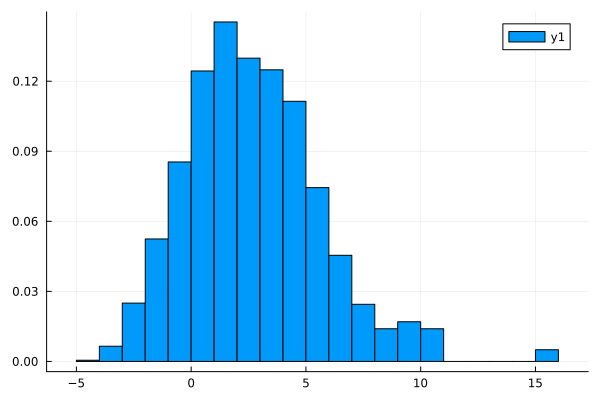

In [34]:
histogram(evs;
    normalize=:pdf,
)

In [35]:
evs_unf = unfold(RealSpectrum(evs), 10) # is not sorted anymore
# the wrapper `RealSpectrum` is tedious here
# I understand that only unfolded spectra should be used for e.g. level spacings,
# but this is just unnecessary. If one wants to dispatch on real/complex values, then
# one should dispatch on element type of array.

## PROBLEM: This package stresses the importance of unfolding. Then unfold(...) should
# report in some way the goodness of fit. How to do that?

# see below for examples where fitting the density obviously goes wrong

UnfoldedSpectrum([-3.499536432073678, -4.6811406799547415, -1.6767099300439323, 0.15689660881742637, 2.1113048989845105, 5.1822712666409885, 5.651228097021282, 7.929695830897192, 8.942775901053718, 10.566838561072505  …  2013.953260279427, 1992.2976189835915, 1992.2835523536367, 1992.2598548234162, 1992.2314703336062, 1992.204251223034, 1992.1832683188534, 1992.1688037687206, 1992.2709641645574, 2021.896272492229])

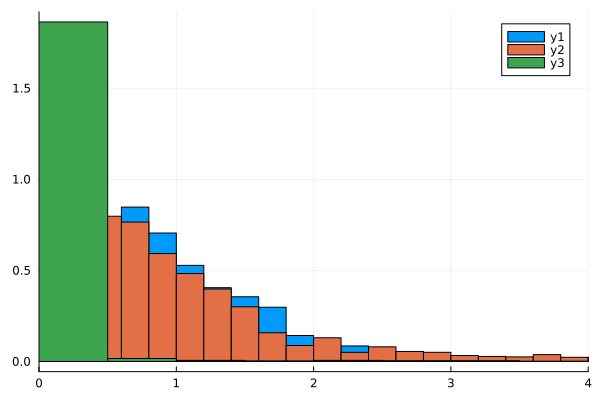

In [50]:
histogram(level_spacing(unfold(RealSpectrum(evs), 10));
    xlims=(0,4),
    normalize=:pdf,
)
histogram!(level_spacing(unfold(RealSpectrum(evs), 2));
    xlims=(0,4),
    normalize=:pdf,
)
histogram!(level_spacing(unfold(RealSpectrum(evs), 30));
    xlims=(0,4),
    normalize=:pdf,
)

In [36]:
issorted(evs_unf.data)

false

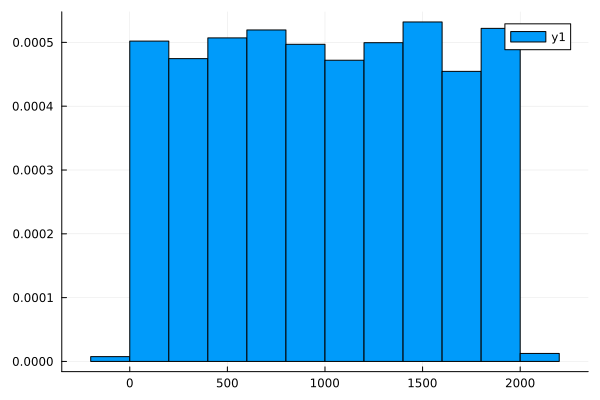

In [37]:
histogram(evs_unf.data;
    normalize=:pdf,
)

How to plot estimated level density by `unfold`?? --> first fit, then unfold with fitted function

In [44]:
fit_integrated_density(RealSpectrum(evs), 10)
## what is this returning ???
## looking at code, I guess it is monomial coefficients.
## BETTER: return density as function

11-element Vector{Float64}:
 344.7443666819386
 218.48233299396867
  34.29089483366847
  -5.181979007274278
  -0.8914176838538626
   0.25183235514028574
  -0.0055719328914376485
  -0.005340808149258016
   0.0008020107745524667
  -4.559370469835828e-5
   9.284794877728159e-7

## level spacings

In [38]:
level_spacing(evs_unf) # has negative values

2001-element Vector{Float64}:
  -1.1816042478810633
   3.004430749910809
   1.8336065388613587
   1.954408290167084
   3.070966367656478
   0.4689568303802938
   2.2784677338759094
   1.0130800701565263
   1.6240626600187866
   2.890771091146574
   ⋮
 -21.655641295835494
  -0.014066629954868404
  -0.02369753022048826
  -0.028384489809923252
  -0.027219110572332283
  -0.02098290418052784
  -0.01446455013274317
   0.10216039583679049
  29.62530832767152

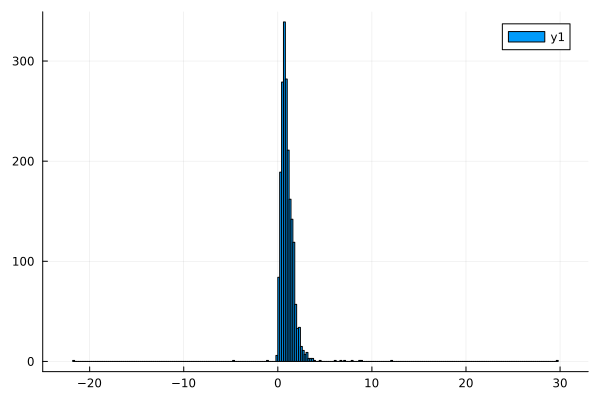

In [39]:
histogram(level_spacing(evs_unf)) # shows negative eigenvalues

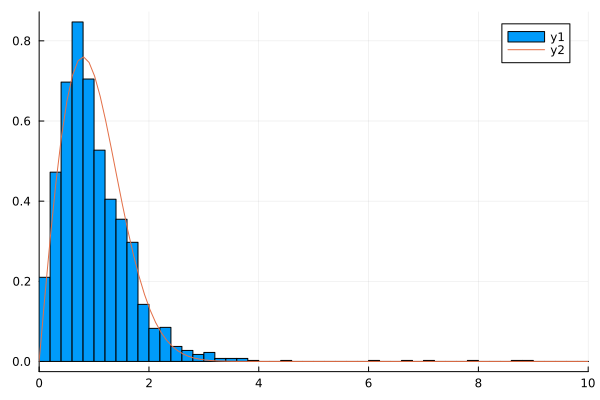

In [40]:
histogram(level_spacing(evs_unf);
    xlims=(0,10),
    normalize=:pdf,
)
xs = range(0,10;length=100)
plot!(xs, (x->level_spacing_pdf(GOE(), x)).(xs)) # not very convenient, better level_spacing_pdf.(GOE(), xs)) ??